# Evalution metrics for Linear Regression: Assignment

Question 1: What is Simple Linear Regression?

Answer:
Simple Linear Regression is a statistical technique used to model the relationship between two variables: one independent variable (X) and one dependent variable (Y).

Question 2: What are the key assumptions of Simple Linear Regression?

Answer:

Linearity: The relationship between X and Y is linear.

Independence: Observations are independent of each other.

Homoscedasticity: Constant variance of residuals across values of X.

Normality: Residuals are normally distributed.

No multicollinearity: (Not applicable in simple regression since only one predictor).

Question 3: What is heteroscedasticity, and why is it important to address?

Answer:
Heteroscedasticity occurs when the variance of residuals is not constant across levels of the independent variable.

Why important?
- It violates regression assumptions.

- It can lead to inefficient estimates and incorrect significance tests.

- Standard errors may be biased, causing unreliable confidence intervals and hypothesis tests.

Question 4: What is Multiple Linear Regression?

Answer:

Multiple Linear Regression (MLR) models the relationship between one dependent variable (Y) and two or more independent variables(X1,X2,............Xn).

It allows us to analyze the combined effect of several factors on the dependent variable.

Question 5: What is polynomial regression, and how does it differ from linear regression?

Answer:

Polynomial regression is a type of regression where the relationship between X and Y is modeled as an nth-degree polynomial. It shows us curved relationship, useful when data shows non-linearity.

Question 6:  Implement a Python program to fit a Simple Linear Regression model to
the following sample data:

● X = [1, 2, 3, 4, 5]

● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Plot the regression line over the data points.

Answer:

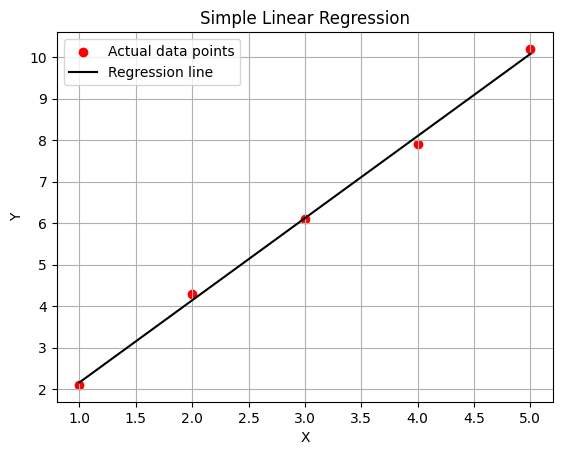

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data :
X = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])
# model
model = LinearRegression()
model.fit(X,Y)

Y_pred= model.predict(X) # predicted values

# visualization:
plt.scatter(X,Y,color= 'red',label = 'Actual data points')
plt.plot(X,Y_pred,color = 'black',label = 'Regression line')
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()

Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.

Answer:

In [8]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data
data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
Y = data['Price']

# Add constant
X_const = sm.add_constant(X)

# Fit model
model = sm.OLS(Y, X_const).fit()
print(model.summary())

# VIF Calculation
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print(vif)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Tue, 02 Sep 2025   Prob (F-statistic):             0.0377
Time:                        09:38:30   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


Question 8:  Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.

Answer:

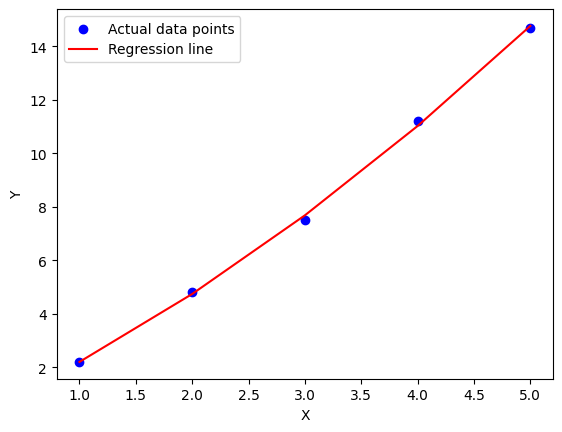

Coefficients: [0.   1.94 0.2 ]
Intercept: 0.06000000000000938


In [10]:
from sklearn.preprocessing import PolynomialFeatures

X = np.array([1, 2, 3, 4, 5]).reshape(-1,1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

y_poly_pred = model.predict(X_poly)

plt.scatter(X, Y, color="blue",label = 'Actual data points')
plt.plot(X, y_poly_pred, color="red",label = 'Regression line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.

Answer:  

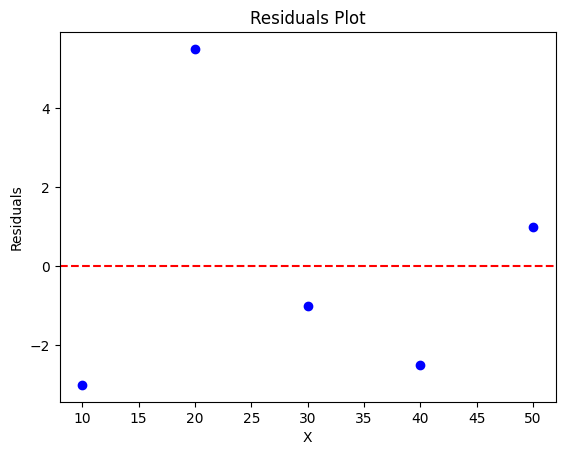

In [11]:
X = np.array([10, 20, 30, 40, 50]).reshape(-1,1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)

# Residuals
residuals = Y - y_pred

# Plot
plt.scatter(X, residuals, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()


Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.

Answer:

1. Handling Heteroscedasticity (unequal error variance):
 - Check residual plots: First, I will confirm heteroscedasticity by plotting residuals vs predicted values.

 - Transform variables: Apply log or square root transformation on price or area to stabilize variance.

 - Use Weighted Least Squares (WLS): Give different weights to data points based on their variance.

 - Use Robust Regression: This adjusts standard errors so that results remain reliable even with heteroscedasticity.

2. Handling Multicollinearity (correlated predictors):

 - Check VIF (Variance Inflation Factor): Identify which features are highly correlated.

 - Remove/Combine variables: For example, if area and rooms are strongly correlated, I might keep only one or create a new feature like price per room.

 - Use Regularization: Apply Ridge or Lasso regression to reduce the impact of correlated variables.

 - Dimensionality Reduction: Use PCA (Principal Component Analysis) if there are too many correlated features.

3. Final Steps to Ensure a Robust Model:

 - Re-train the model after fixing these issues.

 - Validate the model using cross-validation.

 - Compare performance metrics (R², RMSE) before and after improvements.

 - Make sure the model is interpretable and stable for business use.